In [1]:
#Importing the required libraries and loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
customer_df = pd.read_csv ('casestudy2.csv',header=0,index_col=0)

In [2]:
customer_df.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


### Check for data cleaning

In [3]:
customer_df.isnull().values.any()

False

In [4]:
customer_df.shape

(685927, 3)

In [5]:
customer_df.year.unique()

array([2015, 2016, 2017], dtype=int64)

### Total customer revenue for each year


In [6]:
customer_df.groupby('year')[['net_revenue']].sum()

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


### New customers are the ones which appears only once in the data set

In [7]:
NewCustomer = pd.DataFrame()

In [8]:
NewCustomer = customer_df.groupby("customer_email").filter(lambda x: len(x) == 1)

In [9]:
NewCustomer.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


### New customer revenue for each year

In [27]:
NewCustomer.groupby('year')[['net_revenue']].sum()

,net_revenue
year,
2015,2.147600e+07
2016,1.639737e+07
2017,2.867661e+07


### Existing customer are the one which appers more than once in the data set

In [10]:
ExistingCustomers = pd.DataFrame()
ExistingCustomers = customer_df.groupby("customer_email").filter(lambda x: len(x) >= 2)

In [11]:
CountEC = ExistingCustomers.groupby(['year','customer_email'])['net_revenue'].sum().reset_index()

### Existing customer revenue for each year

In [12]:
CountEC_2015 = CountEC.loc[CountEC.year == 2015] 
Revenue_2015 = CountEC_2015['net_revenue'].sum()

In [13]:
Revenue_2015

7560748.49

In [14]:
CountEC_2016 = CountEC.loc[CountEC.year == 2016] 
Revenue_2016 = CountEC_2016['net_revenue'].sum()

In [15]:
Revenue_2016

9333573.430000002

In [16]:
CountEC_2017 = CountEC.loc[CountEC.year == 2017] 
Revenue_2017 = CountEC_2017['net_revenue'].sum()

In [17]:
Revenue_2017

2740887.39

### Existing customer revenue growth for each year

### Existing customer revenue for each prior year

### Revenue lost from customer attrition for each year

In [18]:
Revenue_lost_2015_2016 = ((Revenue_2015 - Revenue_2016)/Revenue_2015)*100

In [19]:
Revenue_lost_2015_2016

-23.447743862195335

In [20]:
Revenue_gain_2016_2017 = ((Revenue_2016 - Revenue_2017)/Revenue_2016)*100

In [21]:
Revenue_gain_2016_2017

70.63410482002283

### Total customers for each year

In [22]:
Totalcustomers = customer_df.groupby('year')[['customer_email']].count().reset_index()

In [23]:
Totalcustomers

,year,customer_email
0,2015,231294
1,2016,204646
2,2017,249987


### New customers for each year

In [48]:
CountNC = NewCustomer.groupby('year')[['customer_email']].count().reset_index()

In [25]:
CountNC

,year,customer_email
0,2015,170944
1,2016,130265
2,2017,228262


### Lost customers for each year

In [26]:
Totalcustomers_2015 =  Totalcustomers["year"] == 2015

In [27]:
Totalcustomers_2015 = Totalcustomers.loc[Totalcustomers.year == 2015] 

In [28]:
Totalcustomers_2016 = Totalcustomers.loc[Totalcustomers.year == 2016] 

In [29]:
Totalcustomers_2017 = Totalcustomers.loc[Totalcustomers.year == 2017] 

In [30]:
CountNC_2015 = CountNC.loc[CountNC.year == 2015] 

In [31]:
CountNC_2016 = CountNC.loc[CountNC.year == 2016] 

In [32]:
CountNC_2017 = CountNC.loc[CountNC.year == 2017] 

In [33]:
LostCustomer_2015 = Totalcustomers_2015 - CountNC_2015

In [34]:
LostCustomer_2015

,year,customer_email
0,0,60350


In [35]:
LostCustomer_2016 = Totalcustomers_2016 - CountNC_2016

In [36]:
LostCustomer_2016

,year,customer_email
1,0,74381


In [37]:
LostCustomer_2017 = Totalcustomers_2017 - CountNC_2017

In [38]:
LostCustomer_2017

,year,customer_email
2,0,21725


### Visualizations

### Breakdown of order ranges between years

### For 2015

In [39]:
customer_df_2015 = customer_df.loc[customer_df.year == 2015] 
customer_df_2015.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [40]:
#Creating a new column 'bins'
customer_df_2015['bins'] = pd.cut(x=customer_df_2015['net_revenue'],  bins=[1,50, 100, 150, 200, 250],
                    labels=['1 to 50', '51 to 100', '101 to 150', 
                            '151 to 200', '201 to 250'])

C:\Users\ancna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


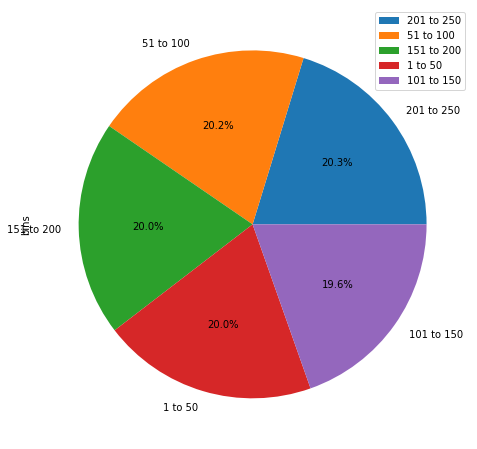

In [41]:
#Checking for revenue orders w.r.t to the nins created
f,ax=plt.subplots(figsize=(20,8))
customer_df_2015['bins'].value_counts().plot.pie(autopct='%1.1f%%',labels=customer_df_2015['bins'].unique())
plt.legend()
plt.show()

### Distribution of all the years together

In [44]:

customer_df['bins'] = pd.cut(x=customer_df['net_revenue'],  bins=[1,50, 100, 150, 200, 250],
                    labels=['1 to 50', '51 to 100', '101 to 150', 
                            '151 to 200', '201 to 250'])

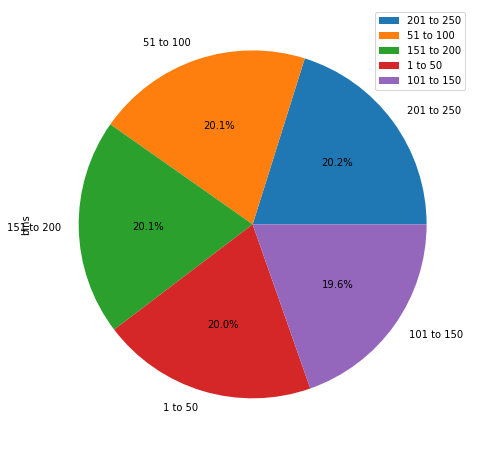

In [46]:
#Checking for revenue orders w.r.t to the bins created
f,ax=plt.subplots(figsize=(20,8))
customer_df['bins'].value_counts().plot.pie(autopct='%1.1f%%',labels=customer_df['bins'].unique())
plt.legend()
plt.show()

### Visualization showing revenue lost/gained for existing customers and new customers

In [64]:
#Defining the function count plot
import seaborn as sns
import matplotlib.pyplot as plt
def count_plot(dataframe, column_name, title =None, hue = None):
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    plt.xticks(rotation=45)

In [49]:
CountEC_group = ExistingCustomers.groupby('year')['net_revenue'].sum().reset_index()
CountNC_group = NewCustomer.groupby('year')['net_revenue'].sum().reset_index()

### Visualization of revenue lost and gained over three years for existing customers

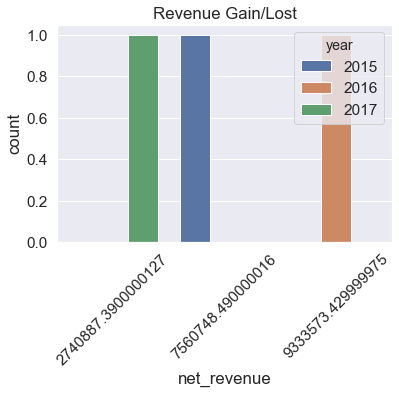

In [215]:
count_plot(CountEC_group,"net_revenue","Revenue Gain/Lost","year")

### Visualization of revenue lost and gained over the three years for New customers

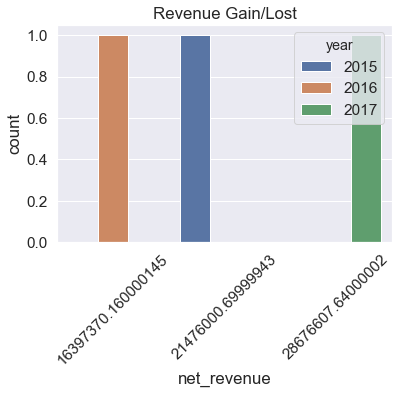

In [216]:
count_plot(CountNC_group,"net_revenue","Revenue Gain/Lost","year")

### Bar chart or another visualization showing patterns of new vs existing customers purchase

Maroon = New Customer/ Blue = Existing Customer

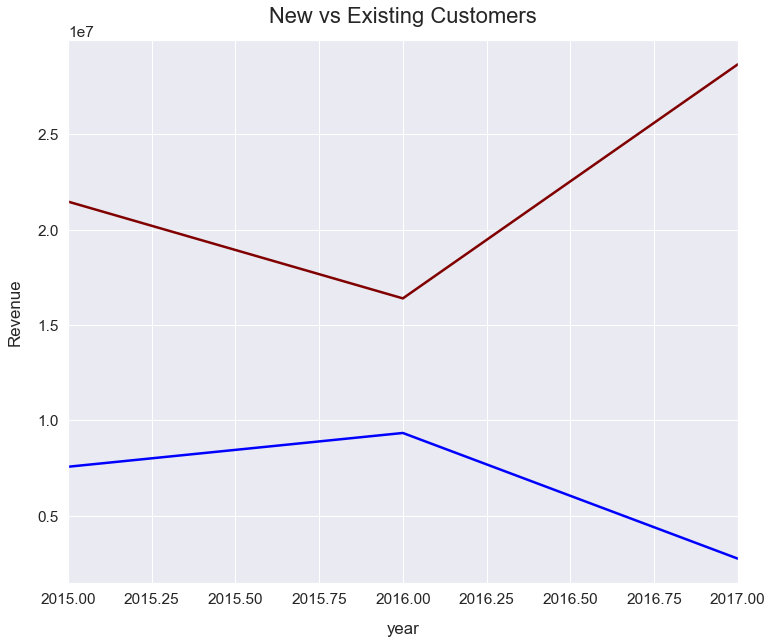

In [182]:
sns.set(font_scale=1.4)
CountNC_group.set_index('year')['net_revenue'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("year", labelpad=15)
plt.ylabel("Revenue", labelpad=15)
plt.title("New vs Existing Customers", y=1.02, fontsize=22)

sns.set(font_scale=1.4)
CountEC_group.set_index('year')['net_revenue'].plot(figsize=(12, 10), linewidth=2.5, color='blue')
plt.xlabel("year", labelpad=15)
plt.ylabel("Revenue", labelpad=15)
plt.title("New vs Existing Customers", y=1.02, fontsize=22)
plt.xticks([0, 200, 400, 600])

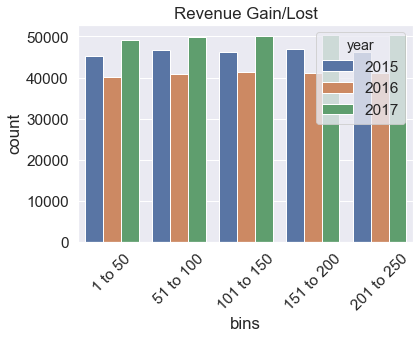

In [70]:
count_plot(customer_df,"bins","Revenue Gain/Lost","year")